In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
import os

In [5]:
rel_path = "../../data/results/cnn_results/model_training_results_cnn_5_10may_R.csv"

data = pd.read_csv(rel_path)

In [6]:
%%script echo Skipping!
plt.figure(figsize=(10, 6))
plt.scatter(data['variation'], data['Accuracy'], color='blue', alpha=0.5)
plt.xticks(ticks=np.arange(0, data['variation'].max() + 0.25, 0.25))  # Custom ticks at every 0.25 interval
plt.title('Accuracy vs Variation')
plt.xlabel('Variation')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

Couldn't find program: 'echo'


In [7]:
# Code for generating plot
# Define the plotting function similar to 'gen_plot_panel' from https://github.com/e-pet/adni-bias/blob/main/analysis.py
def gen_plot_panel(x_var, y_var, data, min_jitter, max_jitter):
    # Perform OLS regression and get the results
    mdl = ols(formula=f'{y_var} ~ {x_var}', data=data)
    results = mdl.fit()
    slope = results.params[1]
    slope_std = results.bse[1]
    p_value = results.pvalues[1]
    # Bonferroni correction is not required here as we only do one test

    # Plot regression line and annotate with stats
    ax = plt.gca()
    slope_str = f"Slope (m): {slope:.3f} ± {slope_std:.3f}\n"
    p_str = f"p-value (corr): {p_value:.4f}\n"
    mu_str = f"Mean (μ): {data[y_var].mean():.3f} ± {data[y_var].std():.3f}"
    text_str = slope_str + p_str + mu_str
    t = ax.text(0.05, 0.95, text_str, transform=ax.transAxes, fontsize=9, verticalalignment='top')
    t.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='black'))
    
    # Add the regression line
    sns.regplot(x=x_var, y=y_var, data=data, ax=ax, scatter=False, fit_reg=True, color="black", line_kws={'linewidth': 1})
    # Jitter the data points for scatter plot
    data[x_var] = data[x_var] + np.random.uniform(min_jitter, max_jitter, data[x_var].shape)
    # Plot the jittered scatter points
    sns.scatterplot(x=x_var, y=y_var, data=data, hue='variation_hue', s=30, ax=ax, palette="viridis", linewidth=0, alpha=0.7, legend=None)


C:\Users\andre\AppData\Local\Temp\ipykernel_13348\1907743489.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = results.params[1]
C:\Users\andre\AppData\Local\Temp\ipykernel_13348\1907743489.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope_std = results.bse[1]
C:\Users\andre\AppData\Local\Temp\ipykernel_13348\1907743489.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = results.pvalues[1]


0.7884615384615384
0.5384615384615384


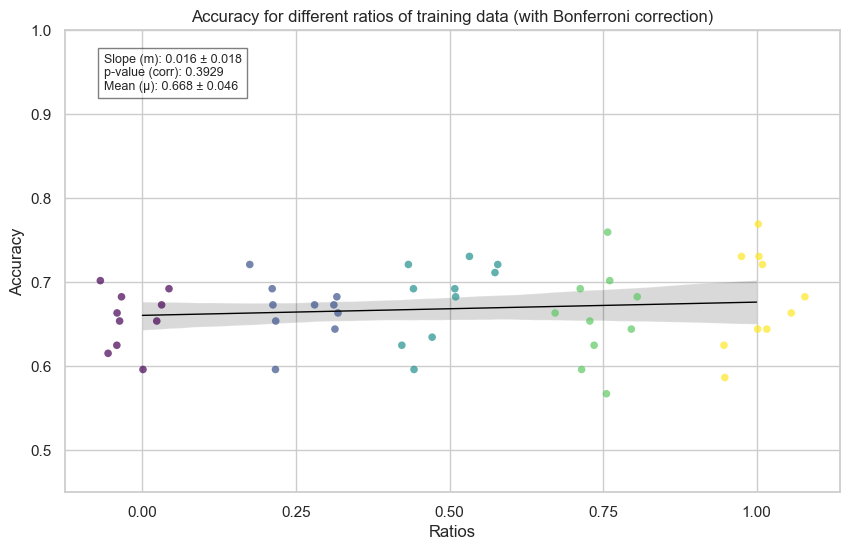

In [8]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Prepare the dataframe in the same format expected by the plotting function
# In this case, we are just duplicating the variation column to serve as a hue for color
df_for_plot = data.copy()
df_for_plot['variation_hue'] = df_for_plot['variation']

# Generate the plot
gen_plot_panel(x_var='variation', y_var='accuracy', data=df_for_plot, min_jitter=-0.08, max_jitter=0.08)



plt.xticks(ticks=np.arange(0, data['variation'].max() + 0.25, 0.25))  # Custom ticks at every 0.25 interval
plt.ylim(bottom=0.45, top=1.0)  # Custom y-axis limits
plt.xlabel('Ratios')
plt.ylabel('Accuracy')
plt.title('Accuracy for different ratios of training data (with Bonferroni correction)')
print(df_for_plot["accuracy_female"].max())
print(df_for_plot["accuracy_female"].min())
plt.show()

C:\Users\andre\AppData\Local\Temp\ipykernel_13348\1907743489.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = results.params[1]
C:\Users\andre\AppData\Local\Temp\ipykernel_13348\1907743489.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope_std = results.bse[1]
C:\Users\andre\AppData\Local\Temp\ipykernel_13348\1907743489.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = results.pvalues[1]


0.8332100591715975
0.6079881656804734


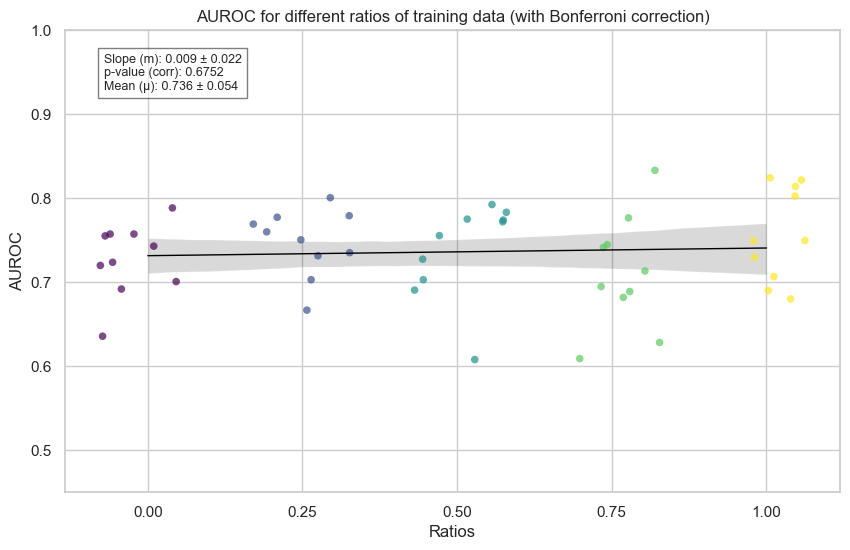

In [9]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Prepare the dataframe in the same format expected by the plotting function
# In this case, we are just duplicating the variation column to serve as a hue for color
df_for_plot = data.copy()
df_for_plot['variation_hue'] = df_for_plot['variation']

# Generate the plot
gen_plot_panel(x_var='variation', y_var='ROC', data=df_for_plot, min_jitter=-0.08, max_jitter=0.08)
plt.xticks(ticks=np.arange(0, data['variation'].max() + 0.25, 0.25))  # Custom ticks at every 0.25 interval
plt.ylim(bottom=0.45, top=1.0)  # Custom y-axis limits
plt.xlabel('Ratios')
plt.ylabel('AUROC')
plt.title('AUROC for different ratios of training data (with Bonferroni correction)')
print(df_for_plot["ROC"].max())
print(df_for_plot["ROC"].min())
plt.show()


C:\Users\andre\AppData\Local\Temp\ipykernel_13348\1907743489.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = results.params[1]
C:\Users\andre\AppData\Local\Temp\ipykernel_13348\1907743489.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope_std = results.bse[1]
C:\Users\andre\AppData\Local\Temp\ipykernel_13348\1907743489.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = results.pvalues[1]


Max ACC female 0.7884615384615384
Min ACC female 0.5384615384615384


C:\Users\andre\AppData\Local\Temp\ipykernel_13348\1907743489.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = results.params[1]
C:\Users\andre\AppData\Local\Temp\ipykernel_13348\1907743489.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope_std = results.bse[1]
C:\Users\andre\AppData\Local\Temp\ipykernel_13348\1907743489.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = results.pvalues[1]


Max AUROC female 0.8653846153846154
Min AUROC female 0.5340236686390533


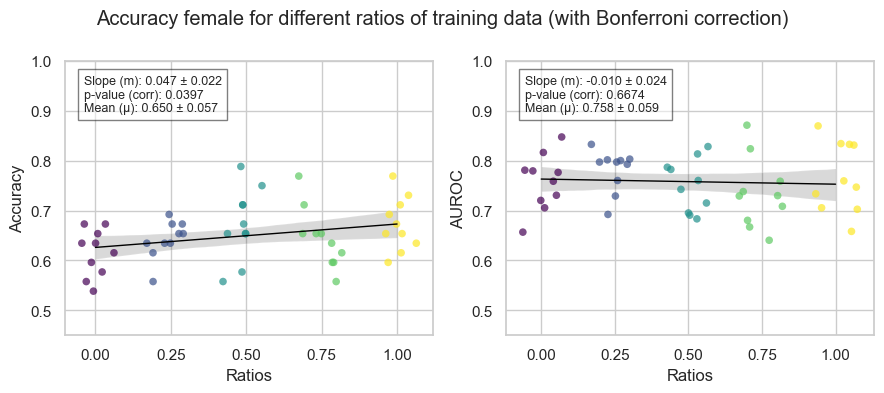

In [10]:
# Adjusted version of the plotting code to include Bonferroni correction and statistical details for both plots

# Set up the subplot grid
plt.figure(figsize=(9, 4))
ax0 = plt.subplot(1, 2, 1)
ax1 = plt.subplot(1, 2, 2)

# Make the first plot
plt.sca(ax0)
df_for_plot = data.copy()
df_for_plot['variation_hue'] = df_for_plot['variation']
gen_plot_panel(x_var='variation', y_var='accuracy_female', data=df_for_plot, min_jitter=-0.08, max_jitter=0.08)

plt.xticks(ticks=np.linspace(0, data['variation'].max(), num=5))  # Adjust spacing between ticks'

ax0.set_xlabel('Ratios')
ax0.set_ylabel('Accuracy')
ax0.set_ylim(0.45, 1)  # Set y-axis limits
print(f'Max ACC female {df_for_plot["accuracy_female"].max()}')
print(f'Min ACC female {df_for_plot["accuracy_female"].min()}')



# Make the second plot
plt.sca(ax1)
df_for_plot = data.copy()
df_for_plot['variation_hue'] = df_for_plot['variation']
gen_plot_panel(x_var='variation', y_var='ROC_male', data=df_for_plot, min_jitter=-0.08, max_jitter=0.08)
plt.xticks(ticks=np.linspace(0, data['variation'].max(), num=5))  # Adjust spacing between ticks

# plt.ylim(bottom=0.5, top=1.0)  # Custom y-axis limits
ax1.set_xlabel('Ratios')
ax1.set_ylabel('AUROC')
ax1.set_ylim(0.45, 1)  # Set y-axis limits
plt.savefig('cnn_plots/acc_auroc_cnn.png')
print(f'Max AUROC female {df_for_plot["ROC_female"].max()}')
print(f'Min AUROC female {df_for_plot["ROC_female"].min()}')


plt.tight_layout()
plt.subplots_adjust(top=0.85)
# TODO: Change title
plt.suptitle('Accuracy female for different ratios of training data (with Bonferroni correction)')
plt.show()

C:\Users\andre\AppData\Local\Temp\ipykernel_13348\1907743489.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = results.params[1]
C:\Users\andre\AppData\Local\Temp\ipykernel_13348\1907743489.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope_std = results.bse[1]
C:\Users\andre\AppData\Local\Temp\ipykernel_13348\1907743489.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = results.pvalues[1]


Max ACC male 0.7692307692307693
Min ACC male 0.5769230769230769


C:\Users\andre\AppData\Local\Temp\ipykernel_13348\1907743489.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = results.params[1]
C:\Users\andre\AppData\Local\Temp\ipykernel_13348\1907743489.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope_std = results.bse[1]
C:\Users\andre\AppData\Local\Temp\ipykernel_13348\1907743489.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = results.pvalues[1]


Max AUROC male 0.8713017751479291
Min AUROC male 0.6405325443786982


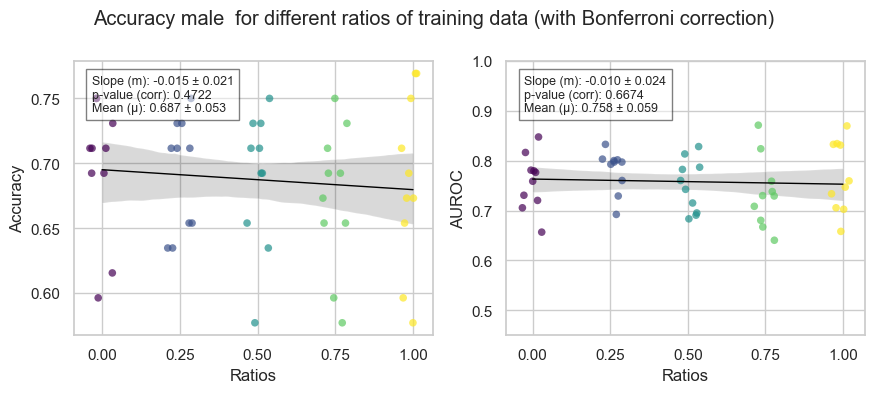

In [22]:
# Adjusted version of the plotting code to include Bonferroni correction and statistical details for both plots

# Set up the subplot grid
plt.figure(figsize=(9, 4))
ax0 = plt.subplot(1, 2, 1)
ax1 = plt.subplot(1, 2, 2)

# Make the first plot
plt.sca(ax0)
df_for_plot = data.copy()
df_for_plot['variation_hue'] = df_for_plot['variation']
gen_plot_panel(x_var='variation', y_var='accuracy_male', data=df_for_plot, min_jitter=-0.04, max_jitter=0.04)

plt.xticks(ticks=np.linspace(0, data['variation'].max(), num=5))  # Adjust spacing between ticks'

ax0.set_xlabel('Ratios')
ax0.set_ylabel('Accuracy')
print(f'Max ACC male {df_for_plot["accuracy_male"].max()}')
print(f'Min ACC male {df_for_plot["accuracy_male"].min()}')


# Make the second plot
plt.sca(ax1)
df_for_plot = data.copy()
df_for_plot['variation_hue'] = df_for_plot['variation']
gen_plot_panel(x_var='variation', y_var='ROC_male', data=df_for_plot, min_jitter=-0.04, max_jitter=0.04)
plt.xticks(ticks=np.linspace(0, data['variation'].max(), num=5))  # Adjust spacing between ticks

ax1.set_xlabel('Ratios')
ax1.set_ylabel('AUROC')
ax1.set_ylim(0.45, 1)  # Set y-axis limits
plt.savefig('cnn_plots/acc_auroc_cnn.png')
print(f'Max AUROC male {df_for_plot["ROC_male"].max()}')
print(f'Min AUROC male {df_for_plot["ROC_male"].min()}')


plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.suptitle('Accuracy male  for different ratios of training data (with Bonferroni correction)')
plt.show()

C:\Users\andre\AppData\Local\Temp\ipykernel_13348\1907743489.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = results.params[1]
C:\Users\andre\AppData\Local\Temp\ipykernel_13348\1907743489.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope_std = results.bse[1]
C:\Users\andre\AppData\Local\Temp\ipykernel_13348\1907743489.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = results.pvalues[1]


Max ACC female 0.7884615384615384
Min ACC female 0.5384615384615384
Max AUROC female 0.8653846153846154
Min AUROC female 0.5340236686390533


C:\Users\andre\AppData\Local\Temp\ipykernel_13348\1907743489.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = results.params[1]
C:\Users\andre\AppData\Local\Temp\ipykernel_13348\1907743489.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope_std = results.bse[1]
C:\Users\andre\AppData\Local\Temp\ipykernel_13348\1907743489.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = results.pvalues[1]
C:\Users\andre\

Max ACC male 0.7692307692307693
Min ACC male 0.5769230769230769


C:\Users\andre\AppData\Local\Temp\ipykernel_13348\1907743489.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = results.params[1]
C:\Users\andre\AppData\Local\Temp\ipykernel_13348\1907743489.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope_std = results.bse[1]
C:\Users\andre\AppData\Local\Temp\ipykernel_13348\1907743489.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = results.pvalues[1]


Max AUROC male 0.8713017751479291
Min AUROC male 0.6405325443786982


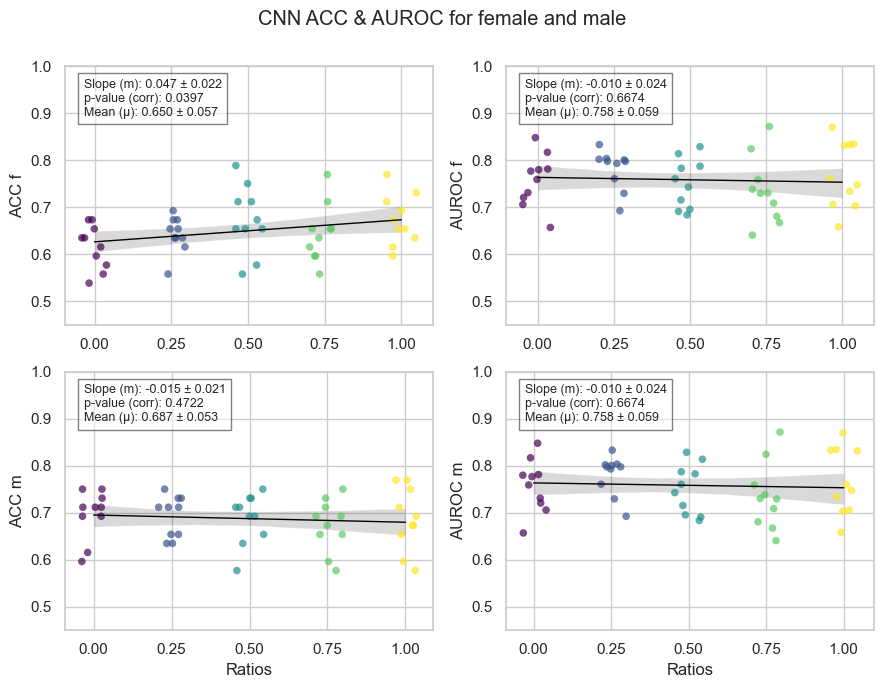

In [21]:
# Adjusted version of the plotting code to include Bonferroni correction and statistical details for both plots

# Set up the subplot grid
plt.figure(figsize=(9, 7))
ax0 = plt.subplot(2, 2, 1)
ax1 = plt.subplot(2, 2, 2)
ax2 = plt.subplot(2, 2, 3)
ax3 = plt.subplot(2, 2, 4)

# Make the first plot
plt.sca(ax0)
df_for_plot = data.copy()
df_for_plot['variation_hue'] = df_for_plot['variation']
gen_plot_panel(x_var='variation', y_var='accuracy_female', data=df_for_plot, min_jitter=-0.05, max_jitter=0.05)

plt.xticks(ticks=np.linspace(0, data['variation'].max(), num=5))  # Adjust spacing between ticks'

ax0.set_xlabel('')
ax0.set_ylabel('ACC f')
ax0.set_ylim(0.45, 1)  # Set y-axis limits
print(f'Max ACC female {df_for_plot["accuracy_female"].max()}')
print(f'Min ACC female {df_for_plot["accuracy_female"].min()}')



# Make the second plot
plt.sca(ax1)
df_for_plot = data.copy()
df_for_plot['variation_hue'] = df_for_plot['variation']
gen_plot_panel(x_var='variation', y_var='ROC_male', data=df_for_plot, min_jitter=-0.05, max_jitter=0.05)
plt.xticks(ticks=np.linspace(0, data['variation'].max(), num=5))  # Adjust spacing between ticks

# plt.ylim(bottom=0.5, top=1.0)  # Custom y-axis limits
ax1.set_xlabel('')
ax1.set_ylabel('AUROC f')
ax1.set_ylim(0.45, 1)  # Set y-axis limits
print(f'Max AUROC female {df_for_plot["ROC_female"].max()}')
print(f'Min AUROC female {df_for_plot["ROC_female"].min()}')


# Make the third plot
plt.sca(ax2)
df_for_plot = data.copy()
df_for_plot['variation_hue'] = df_for_plot['variation']
gen_plot_panel(x_var='variation', y_var='accuracy_male', data=df_for_plot, min_jitter=-0.05, max_jitter=0.05)
plt.xticks(ticks=np.linspace(0, data['variation'].max(), num=5))  # Adjust spacing between ticks'

ax2.set_xlabel('Ratios')
ax2.set_ylabel('ACC m')
ax2.set_ylim(0.45, 1)  # Set y-axis limits
print(f'Max ACC male {df_for_plot["accuracy_male"].max()}')
print(f'Min ACC male {df_for_plot["accuracy_male"].min()}')


# Make the fourth plot
plt.sca(ax3)
df_for_plot = data.copy()
df_for_plot['variation_hue'] = df_for_plot['variation']
gen_plot_panel(x_var='variation', y_var='ROC_male', data=df_for_plot, min_jitter=-0.05, max_jitter=0.05)
plt.xticks(ticks=np.linspace(0, data['variation'].max(), num=5))  # Adjust spacing between ticks

ax3.set_xlabel('Ratios')
ax3.set_ylabel('AUROC m')
ax3.set_ylim(0.45, 1)  # Set y-axis limits
print(f'Max AUROC male {df_for_plot["ROC_male"].max()}')
print(f'Min AUROC male {df_for_plot["ROC_male"].min()}')

plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.suptitle('CNN ACC & AUROC for female and male')
# Hide x-axis labels for the first 
plt.savefig('cnn_plots/acc_auroc_f_m_cnn.png')


plt.show()